![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

## Introduction 
In this notebook we will be using the famous titanic datasets and statistical inference on chance of survival between classes
## What will we accomplish?
By the end of the notebook:
1. Trainee will learn how to perform statistical inference and hypothesis testing in titanic dataset.

## Notebook Content
* [Acquire Data](#Acquire)
* [Analyze](#Analyze)
* [Summary](#Summary)
* [Contributors](#Contributors)
* [Reference](#Reference)

In [1]:
# import useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy import stats as st
import seaborn as sn

## <a name="#Acquire">Acquire Data

In [2]:
# Load the data and check the shape:
Data = pd.read_csv('../data/titanic_train.csv')

In [3]:
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## <a name="#Analyze">Analyze
### Did socio-economic class of the people affected their survival rate?
- "Survived" is a binary variable that refers to whether that person survivied
- "Pclass": is a categorical variable that refers to the class of the person in the ship (first, second, or third)

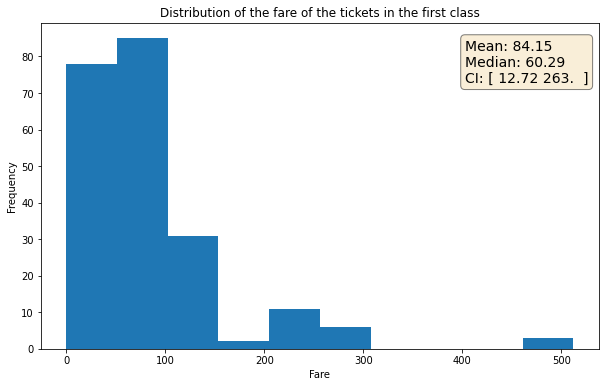

In [4]:
# make histograms of fares over the two classes
# Distribution of the fare of the tickets in the first class
first_fares = Data["Fare"][Data["Pclass"] == 1]
first_mean = round(np.mean(first_fares), 2)
first_median = round(np.median(first_fares), 2)
first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(first_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the first class")
plt.show()

**Ask questions about your data.**<br>
> - ***Observations***<br>
    - First-class tickets range between 12.72\\$ and 263\\$ with an average of 84.15\\$

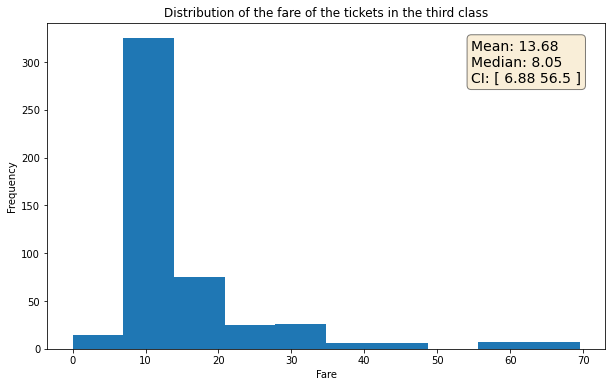

In [5]:
# Distribution of the fare of the tickets in the third class
third_fares = Data["Fare"][Data["Pclass"] == 3]
third_mean = round(np.mean(third_fares), 2)
third_median = round(np.median(third_fares), 2)
third_conf = np.round(np.percentile(third_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(third_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.95, f"Mean: {third_mean} \nMedian: {third_median} \nCI: {third_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the third class")
plt.show()

**Ask questions about your data.**<br>
> - ***Observations***<br>
    - Third class tickets range between 6.88\\$ and 56.5\\$ with an average of 13.68\\$.

**Ask questions about your data.**<br>
> - ***Observations***<br>
    - First class had rich people who paid more and third class had people who paid less.
> - ***Assumption***<br>
    - Class feature is a representation of the socio-economic status of the people in the ship
    - We can assume that those in the first-class group are the rich.
> - ***Question***<br>
    - Did rich people have a better chance of survival?

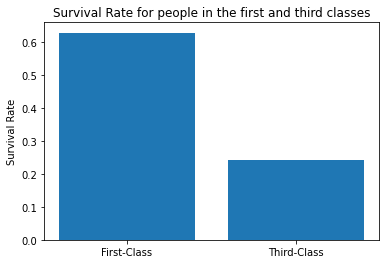

In [6]:
# Compare the survival rate of the two populations
x = ["First-Class", "Third-Class"]
y = [np.mean(Data["Survived"][Data["Pclass"] == 1]),
     np.mean(Data["Survived"][Data["Pclass"] == 3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

**Ask questions about your data.**<br>
> - ***Observations and conclusion***<br>
    - First-class people had a higher rate of survival
    
This conclusion would be invalid for two reasons:
1. The data that we use is a sample data. We don’t know if that sample is random, independent, unbiased, or even representative of the entire population of the people who were on the titanic.
2. This data has been collected by humans so it’s very prone to human error, bias, or randomness that happens in the data collection process.

> - ***What to do next?***<br>
    - Hypothesis testing need to be use to check if the observed difference between the two populations is really significant or is just due to some randomness/bias in the data
    - Perform Z-test on this data

### Z-Test and the Central Limit Theorem for Hypothesis Testing

#### Step 1: Form the hypothesis 
**Null Hypothesis**: The socio-economic class of the people didn’t have an effect on the survival rate.<br>
**Alternative Hypothesis**: The socio-economic class of the people affected their survival rate.

In [7]:
# get samples using Central Limit Theorem
First_Class_Sample = np.array([np.mean(Data[Data["Pclass"] == 1].sample(20)[
                              "Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(Data[Data["Pclass"] == 3].sample(20)[
                              "Survived"].values) for i in range(100)])

c:\anaconda\envs\machine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anaconda\envs\machine\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


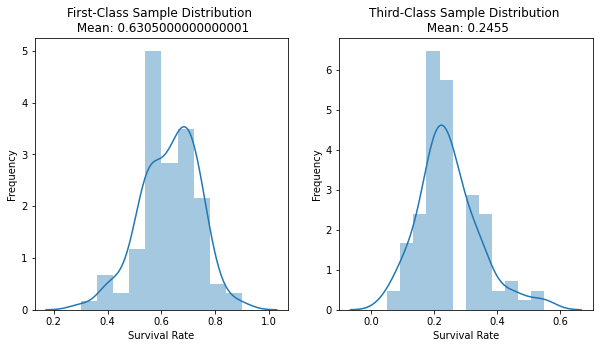

In [8]:
# make plots to check if the distributions are normal.

plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
sn.distplot(First_Class_Sample)

plt.title(
    f"First-Class Sample Distribution \n Mean: {np.mean(First_Class_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")


plt.subplot(1, 2, 2)
sn.distplot(third_Class_Sample)
plt.title(
    f"Third-Class Sample Distribution \n Mean: {np.mean(third_Class_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")


plt.show()

#### Step 2: Calculate the Z-score and the P-value while assuming a significance level of 0.05.

In [9]:
# calculate the z-score and the p-value

effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt(
    (sigma_first**2)/len(First_Class_Sample) + (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference

In [10]:
# P-value for two-tailed test
st.norm.sf(abs(z_score))*2

2.260762520530207e-157

## <a name="Summary">Summary
The P-value is very low and it's safe to reject the null hypothesis.

## <a name="Contributors">Contributors
### Author
BK Yeoh (boonkhai.yeoh@skymind.my)

### Other Contributors
Jing Zhi (jingzhi.loh@skymind.my)

## <a name="Reference">Reference
[Hypothesis Testing Intuitively Explained using the Titanic Dataset in Python.](https://medium.datadriveninvestor.com/hypothesis-testing-intuitively-explained-using-the-titanic-dataset-in-python-5afa1e580ba6)